In [1]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing

In [2]:
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [6]:
data = pd.read_csv('renfe_small.txt')
# data.drop('Unnamed: 0', axis = 1, inplace=True)
data = data.sample(frac=0.01, random_state=99)
data.head(3)

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
4738,2019-04-17 08:03:35,VALENCIA,MADRID,2019-05-21 08:00:00,2019-05-21 09:47:00,AVE,33.65,Turista,Promo
8722,2019-05-09 07:12:41,MADRID,BARCELONA,2019-05-25 08:30:00,2019-05-25 11:15:00,AVE,85.10,Turista,Promo
13185,2019-04-24 11:21:26,MADRID,VALENCIA,2019-05-22 17:40:00,2019-05-22 19:20:00,AVE,51.15,Turista,Promo


In [8]:
data.isnull().sum()/len(data)
data.size

2322

In [9]:
data['train_class'] = data['train_class'].fillna(data['train_class'].mode().iloc[0])
data['fare'] = data['fare'].fillna(data['fare'].mode().iloc[0])
data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))

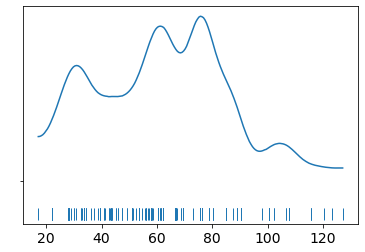

In [10]:
az.plot_kde(data['price'].values, rug=True)
plt.yticks([0], alpha=0);

In [13]:
with pm.Model():
    noise_1 = pm.Normal("noise_1", mu = 0, sigma = 3)

In [14]:
noise_1

noise_1

In [36]:
data1 = pd.read_csv("data.txt", header = None, sep = " ")

In [40]:
data1.iloc[:, 0].to_numpy()

array([4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5,
       5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. ,
       4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. ,
       5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6,
       4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5,
       5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. ,
       4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. ,
       5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6])

In [52]:
with pm.Model() as amplifier_model:
    roh = pm.Uniform("roh", 0.3, 0.98)
    I_set = data1.iloc[:, 0].to_numpy()
    I_pre = roh * I_set + pm.Normal("noise_1", mu = 0, sigma = 1)
    f_I_pre = 5 + 10 / (1 + np.exp(- I_pre + 4))
    I = f_I_pre + pm.Normal('noise_3', sigma = 3)
    P = pm.Deterministic("P", 4 * I * I, observed = data1.iloc[:, 1].to_numpy())

TypeError: Deterministic() got an unexpected keyword argument 'observed'

In [48]:
with amplifier_model:
    

AttributeError: 'TensorVariable' object has no attribute 'random'